In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [2]:
raw = pd.read_csv("ncr_ride_bookings.csv")
df = raw.copy()

In [3]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [4]:
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [5]:
rows, cols = df.shape
print(f"This dataset contains {rows} rows and {cols} columns of data")

This dataset contains 150000 rows and 21 columns of data


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

# Data Handling

## Handling Missing Value

In [7]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In order to further investigate the reasons of missing values, we will perform the handling column by columns

In [8]:
missing_cols = df.columns[df.isnull().any()] # Check whether that col has any missing value
missing_cols

Index(['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [9]:
for col in missing_cols:
    print(f"Random rows with missing values by column '{col}':")
    display(df[df[col].isnull()].sample(n=5, random_state=42)) 
    print("\n")

Random rows with missing values by column 'Avg VTAT':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
72109,2024-02-16,20:37:53,"""CNR5283884""",No Driver Found,"""CID9871725""",Bike,Sarojini Nagar,Akshardham,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127668,2024-05-03,18:48:08,"""CNR3498126""",No Driver Found,"""CID5652582""",eBike,Patel Chowk,Old Gurgaon,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121555,2024-03-27,17:32:31,"""CNR7502503""",No Driver Found,"""CID7202987""",Go Sedan,Rohini,Janakpuri,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103593,2024-02-06,07:47:03,"""CNR6679540""",No Driver Found,"""CID2099612""",Premier Sedan,Sikanderpur,Tagore Garden,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108518,2024-07-27,12:01:01,"""CNR8469009""",No Driver Found,"""CID5290937""",Bike,Laxmi Nagar,Mundka,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Random rows with missing values by column 'Avg CTAT':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
102424,2024-05-24,09:12:21,"""CNR6257462""",No Driver Found,"""CID3197870""",Go Sedan,Akshardham,New Delhi Railway Station,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123673,2024-08-15,19:43:23,"""CNR1125037""",Cancelled by Driver,"""CID3628772""",Premier Sedan,Sarai Kale Khan,Meerut,7.5,NaN,...,NaN,1.0,Customer related issue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136488,2024-03-05,12:50:57,"""CNR4235082""",Cancelled by Customer,"""CID1032610""",Uber XL,Meerut,AIIMS,15.9,NaN,...,Wrong Address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9378,2024-04-16,17:17:52,"""CNR1516488""",Cancelled by Driver,"""CID7432899""",Go Mini,Delhi Gate,Nawada,10.1,NaN,...,NaN,1.0,The customer was coughing/sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10630,2024-01-10,12:53:53,"""CNR1041426""",No Driver Found,"""CID6145585""",Auto,Khan Market,Kherki Daula Toll,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Random rows with missing values by column 'Cancelled Rides by Customer':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
1273,2024-08-19,16:08:28,"""CNR2814652""",Completed,"""CID4581539""",Go Mini,Gurgaon Sector 56,Civil Lines Gurgaon,7.7,43.8,...,NaN,NaN,NaN,NaN,NaN,275.0,23.54,4.6,3.7,Cash
54858,2024-04-24,03:40:07,"""CNR2100952""",Cancelled by Driver,"""CID8171711""",Auto,Central Secretariat,Rajiv Nagar,3.5,NaN,...,NaN,1.0,Customer related issue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12986,2024-12-05,10:05:47,"""CNR5232940""",Completed,"""CID5470649""",Go Sedan,Barakhamba Road,Basai Dhankot,13.6,18.6,...,NaN,NaN,NaN,NaN,NaN,317.0,46.67,4.1,4.8,UPI
15241,2024-06-09,21:14:01,"""CNR1361328""",Completed,"""CID3735077""",Go Sedan,Khandsa,Panipat,10.0,20.0,...,NaN,NaN,NaN,NaN,NaN,1352.0,35.38,4.2,4.3,Debit Card
76532,2024-11-19,16:12:26,"""CNR7039753""",No Driver Found,"""CID9165676""",Bike,Yamuna Bank,Golf Course Road,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Random rows with missing values by column 'Reason for cancelling by Customer':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
1273,2024-08-19,16:08:28,"""CNR2814652""",Completed,"""CID4581539""",Go Mini,Gurgaon Sector 56,Civil Lines Gurgaon,7.7,43.8,...,NaN,NaN,NaN,NaN,NaN,275.0,23.54,4.6,3.7,Cash
54858,2024-04-24,03:40:07,"""CNR2100952""",Cancelled by Driver,"""CID8171711""",Auto,Central Secretariat,Rajiv Nagar,3.5,NaN,...,NaN,1.0,Customer related issue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12986,2024-12-05,10:05:47,"""CNR5232940""",Completed,"""CID5470649""",Go Sedan,Barakhamba Road,Basai Dhankot,13.6,18.6,...,NaN,NaN,NaN,NaN,NaN,317.0,46.67,4.1,4.8,UPI
15241,2024-06-09,21:14:01,"""CNR1361328""",Completed,"""CID3735077""",Go Sedan,Khandsa,Panipat,10.0,20.0,...,NaN,NaN,NaN,NaN,NaN,1352.0,35.38,4.2,4.3,Debit Card
76532,2024-11-19,16:12:26,"""CNR7039753""",No Driver Found,"""CID9165676""",Bike,Yamuna Bank,Golf Course Road,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Random rows with missing values by column 'Cancelled Rides by Driver':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
86718,2024-09-01,10:33:51,"""CNR7679967""",Completed,"""CID5642019""",Go Sedan,Palam Vihar,IFFCO Chowk,12.1,35.5,...,NaN,NaN,NaN,NaN,NaN,457.0,2.09,4.4,4.2,Cash
59439,2024-03-23,10:09:32,"""CNR2732838""",Completed,"""CID3527785""",Go Mini,ITO,Satguru Ram Singh Marg,5.7,20.7,...,NaN,NaN,NaN,NaN,NaN,1393.0,27.91,4.6,4.6,Cash
103213,2024-02-16,12:13:07,"""CNR4147025""",No Driver Found,"""CID7853564""",Go Mini,Sonipat,Vinobapuri,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60252,2024-12-07,10:36:16,"""CNR6366065""",Completed,"""CID6404392""",Bike,Noida Sector 62,Jor Bagh,12.1,29.6,...,NaN,NaN,NaN,NaN,NaN,501.0,25.38,4.8,4.8,UPI
61315,2024-05-22,20:56:14,"""CNR9070544""",Completed,"""CID6594463""",Premier Sedan,Bhiwadi,Pulbangash,4.4,44.3,...,NaN,NaN,NaN,NaN,NaN,783.0,45.43,4.6,4.6,UPI




Random rows with missing values by column 'Driver Cancellation Reason':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
86718,2024-09-01,10:33:51,"""CNR7679967""",Completed,"""CID5642019""",Go Sedan,Palam Vihar,IFFCO Chowk,12.1,35.5,...,NaN,NaN,NaN,NaN,NaN,457.0,2.09,4.4,4.2,Cash
59439,2024-03-23,10:09:32,"""CNR2732838""",Completed,"""CID3527785""",Go Mini,ITO,Satguru Ram Singh Marg,5.7,20.7,...,NaN,NaN,NaN,NaN,NaN,1393.0,27.91,4.6,4.6,Cash
103213,2024-02-16,12:13:07,"""CNR4147025""",No Driver Found,"""CID7853564""",Go Mini,Sonipat,Vinobapuri,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60252,2024-12-07,10:36:16,"""CNR6366065""",Completed,"""CID6404392""",Bike,Noida Sector 62,Jor Bagh,12.1,29.6,...,NaN,NaN,NaN,NaN,NaN,501.0,25.38,4.8,4.8,UPI
61315,2024-05-22,20:56:14,"""CNR9070544""",Completed,"""CID6594463""",Premier Sedan,Bhiwadi,Pulbangash,4.4,44.3,...,NaN,NaN,NaN,NaN,NaN,783.0,45.43,4.6,4.6,UPI




Random rows with missing values by column 'Incomplete Rides':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
23579,2024-02-11,12:13:27,"""CNR3686403""",Completed,"""CID3536841""",Go Mini,Ashram,Maidan Garhi,12.6,28.2,...,NaN,NaN,NaN,NaN,NaN,477.0,35.88,3.5,4.3,Cash
91124,2024-01-02,10:41:07,"""CNR8862896""",Completed,"""CID9670987""",Auto,Ramesh Nagar,Paharganj,8.9,19.2,...,NaN,NaN,NaN,NaN,NaN,650.0,49.83,4.1,4.3,Cash
116619,2024-08-02,19:16:36,"""CNR3531777""",Completed,"""CID3275306""",Premier Sedan,Kashmere Gate,Tughlakabad,12.1,44.8,...,NaN,NaN,NaN,NaN,NaN,73.0,45.97,3.0,3.4,UPI
40432,2024-04-21,12:56:14,"""CNR8389423""",Completed,"""CID3124941""",Bike,Punjabi Bagh,Shahdara,9.7,44.2,...,NaN,NaN,NaN,NaN,NaN,774.0,43.09,4.3,4.9,Cash
119081,2024-03-10,16:43:17,"""CNR5736184""",Completed,"""CID9315858""",Bike,Hero Honda Chowk,Rohini East,9.0,41.2,...,NaN,NaN,NaN,NaN,NaN,818.0,24.23,3.8,4.5,UPI




Random rows with missing values by column 'Incomplete Rides Reason':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
23579,2024-02-11,12:13:27,"""CNR3686403""",Completed,"""CID3536841""",Go Mini,Ashram,Maidan Garhi,12.6,28.2,...,NaN,NaN,NaN,NaN,NaN,477.0,35.88,3.5,4.3,Cash
91124,2024-01-02,10:41:07,"""CNR8862896""",Completed,"""CID9670987""",Auto,Ramesh Nagar,Paharganj,8.9,19.2,...,NaN,NaN,NaN,NaN,NaN,650.0,49.83,4.1,4.3,Cash
116619,2024-08-02,19:16:36,"""CNR3531777""",Completed,"""CID3275306""",Premier Sedan,Kashmere Gate,Tughlakabad,12.1,44.8,...,NaN,NaN,NaN,NaN,NaN,73.0,45.97,3.0,3.4,UPI
40432,2024-04-21,12:56:14,"""CNR8389423""",Completed,"""CID3124941""",Bike,Punjabi Bagh,Shahdara,9.7,44.2,...,NaN,NaN,NaN,NaN,NaN,774.0,43.09,4.3,4.9,Cash
119081,2024-03-10,16:43:17,"""CNR5736184""",Completed,"""CID9315858""",Bike,Hero Honda Chowk,Rohini East,9.0,41.2,...,NaN,NaN,NaN,NaN,NaN,818.0,24.23,3.8,4.5,UPI




Random rows with missing values by column 'Booking Value':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
102424,2024-05-24,09:12:21,"""CNR6257462""",No Driver Found,"""CID3197870""",Go Sedan,Akshardham,New Delhi Railway Station,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123673,2024-08-15,19:43:23,"""CNR1125037""",Cancelled by Driver,"""CID3628772""",Premier Sedan,Sarai Kale Khan,Meerut,7.5,NaN,...,NaN,1.0,Customer related issue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136488,2024-03-05,12:50:57,"""CNR4235082""",Cancelled by Customer,"""CID1032610""",Uber XL,Meerut,AIIMS,15.9,NaN,...,Wrong Address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9378,2024-04-16,17:17:52,"""CNR1516488""",Cancelled by Driver,"""CID7432899""",Go Mini,Delhi Gate,Nawada,10.1,NaN,...,NaN,1.0,The customer was coughing/sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10630,2024-01-10,12:53:53,"""CNR1041426""",No Driver Found,"""CID6145585""",Auto,Khan Market,Kherki Daula Toll,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Random rows with missing values by column 'Ride Distance':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
102424,2024-05-24,09:12:21,"""CNR6257462""",No Driver Found,"""CID3197870""",Go Sedan,Akshardham,New Delhi Railway Station,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123673,2024-08-15,19:43:23,"""CNR1125037""",Cancelled by Driver,"""CID3628772""",Premier Sedan,Sarai Kale Khan,Meerut,7.5,NaN,...,NaN,1.0,Customer related issue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136488,2024-03-05,12:50:57,"""CNR4235082""",Cancelled by Customer,"""CID1032610""",Uber XL,Meerut,AIIMS,15.9,NaN,...,Wrong Address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9378,2024-04-16,17:17:52,"""CNR1516488""",Cancelled by Driver,"""CID7432899""",Go Mini,Delhi Gate,Nawada,10.1,NaN,...,NaN,1.0,The customer was coughing/sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10630,2024-01-10,12:53:53,"""CNR1041426""",No Driver Found,"""CID6145585""",Auto,Khan Market,Kherki Daula Toll,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Random rows with missing values by column 'Driver Ratings':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
79878,2024-03-16,09:17:58,"""CNR1164373""",No Driver Found,"""CID8695499""",Go Mini,Ashok Vihar,Greater Kailash,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60634,2024-02-25,12:41:55,"""CNR4198621""",Cancelled by Customer,"""CID2759065""",Auto,India Gate,Nawada,13.5,NaN,...,Change of plans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122782,2024-09-25,09:20:49,"""CNR3361760""",Cancelled by Driver,"""CID7155849""",Auto,Indraprastha,Karol Bagh,8.4,NaN,...,NaN,1.0,Personal & Car related issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126026,2024-03-02,08:18:21,"""CNR9731551""",Incomplete,"""CID8267609""",Auto,Lal Quila,Kirti Nagar,7.8,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,152.0,12.87,NaN,NaN,UPI
138329,2024-11-21,09:24:44,"""CNR5404936""",No Driver Found,"""CID3667536""",Go Mini,Ambience Mall,Jahangirpuri,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Random rows with missing values by column 'Customer Rating':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
79878,2024-03-16,09:17:58,"""CNR1164373""",No Driver Found,"""CID8695499""",Go Mini,Ashok Vihar,Greater Kailash,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60634,2024-02-25,12:41:55,"""CNR4198621""",Cancelled by Customer,"""CID2759065""",Auto,India Gate,Nawada,13.5,NaN,...,Change of plans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122782,2024-09-25,09:20:49,"""CNR3361760""",Cancelled by Driver,"""CID7155849""",Auto,Indraprastha,Karol Bagh,8.4,NaN,...,NaN,1.0,Personal & Car related issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126026,2024-03-02,08:18:21,"""CNR9731551""",Incomplete,"""CID8267609""",Auto,Lal Quila,Kirti Nagar,7.8,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,152.0,12.87,NaN,NaN,UPI
138329,2024-11-21,09:24:44,"""CNR5404936""",No Driver Found,"""CID3667536""",Go Mini,Ambience Mall,Jahangirpuri,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Random rows with missing values by column 'Payment Method':


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
102424,2024-05-24,09:12:21,"""CNR6257462""",No Driver Found,"""CID3197870""",Go Sedan,Akshardham,New Delhi Railway Station,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123673,2024-08-15,19:43:23,"""CNR1125037""",Cancelled by Driver,"""CID3628772""",Premier Sedan,Sarai Kale Khan,Meerut,7.5,NaN,...,NaN,1.0,Customer related issue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136488,2024-03-05,12:50:57,"""CNR4235082""",Cancelled by Customer,"""CID1032610""",Uber XL,Meerut,AIIMS,15.9,NaN,...,Wrong Address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9378,2024-04-16,17:17:52,"""CNR1516488""",Cancelled by Driver,"""CID7432899""",Go Mini,Delhi Gate,Nawada,10.1,NaN,...,NaN,1.0,The customer was coughing/sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10630,2024-01-10,12:53:53,"""CNR1041426""",No Driver Found,"""CID6145585""",Auto,Khan Market,Kherki Daula Toll,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
statuses = df['Booking Status'].unique()
print(statuses)

['No Driver Found' 'Incomplete' 'Completed' 'Cancelled by Driver'
 'Cancelled by Customer']


As we could see, all cols have booking IDS and status. For status, depending on 5 situations, other cols might show missing values. For instance, if the trip is completed, 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason' would have missing values. <br><br> According to necessary cols, i.e Date, Time, Booking ID, Booking Status, Customer ID, Vehicle Type, Pickup location, Drop location, they do **not** have any missing value. Hence, we consider this dataset is completed.

## Format unifying

In [11]:
# As some cols having quotes, which is not consistent, so we remove the quotes
string_cols = df.select_dtypes(include='object').columns
for col in string_cols:
    df[col] = df[col].str.strip('"')
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [12]:
# Merging Date and Time 
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df = df.drop(['Date', 'Time'], axis=1)
cols = ['Datetime'] + [col for col in df.columns if col != 'Datetime']
df = df[cols]
df.head()

,Datetime,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23 12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29 18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23 08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21 17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16 22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [13]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.head()

,Datetime,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT,Avg_CTAT,Cancelled_Rides_by_Customer,Reason_for_cancelling_by_Customer,Cancelled_Rides_by_Driver,Driver_Cancellation_Reason,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Payment_Method
0,2024-03-23 12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29 18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23 08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21 17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16 22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [14]:
df[['Avg_VTAT', 'Avg_CTAT', 'Booking_Value', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating']].describe()

,Avg_VTAT,Avg_CTAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,139500.000000,102000.000000,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,4277.000000,50.000000,5.000000,5.000000


In [15]:
# Export DataFrame to a CSV file
df.to_csv('ncr_ride_bookings_cleaned.csv', index=False)

# Data Visualisation

In [ ]:
df = pd.read_csv('ncr_ride_bookings_cleaned.csv')

In [15]:
print(f"The dataset contains data from {df['Datetime'].min()} to {df['Datetime'].max()}.")

The dataset contains data from 2024-01-01 00:19:34 to 2024-12-30 23:36:11.


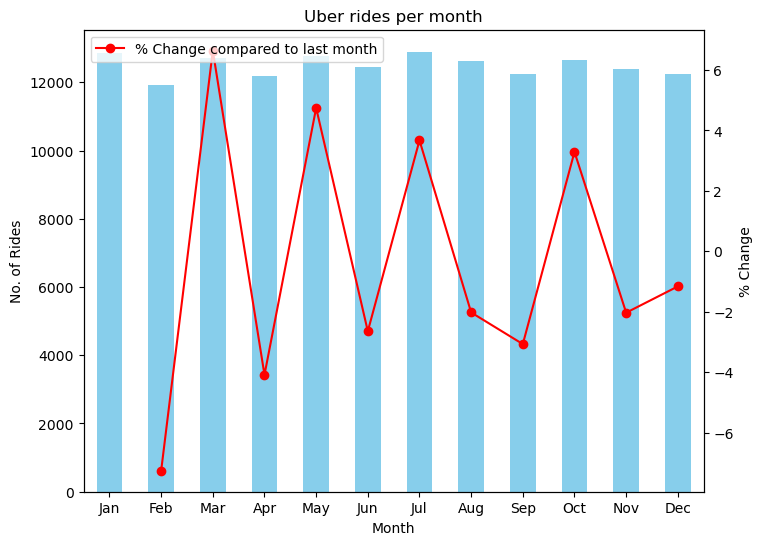

In [16]:
# Bar Chart — Uber rides per month
month_counts = df.set_index('Datetime').resample('M').size()
month_counts.index = month_counts.index.strftime('%b') # By Month's Name

fig, ax1 = plt.subplots(figsize=(8,6))
month_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_xlabel('Month')
ax1.set_ylabel('No. of Rides')
ax1.set_title('Uber rides per month')
ax1.tick_params(axis='x', rotation=0)

pct_change = month_counts.pct_change() * 100
ax2 = ax1.twinx()
ax2.plot(month_counts.index, pct_change, color='red', marker='o', label='% Change compared to last month')
ax2.set_ylabel('% Change')
ax2.legend(loc='upper left')

plt.show()


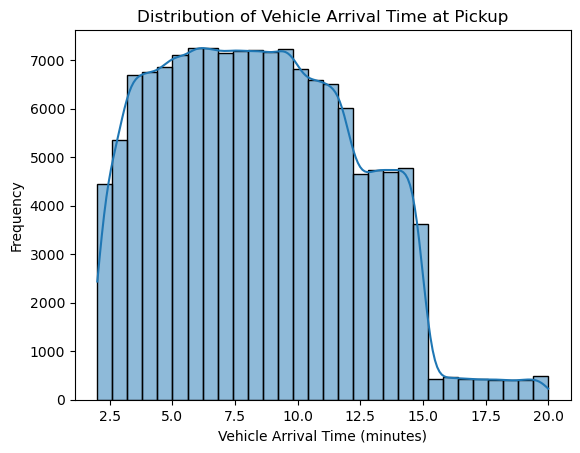

In [17]:
# Vehicle Arrival Time (Pickup)
sns.histplot(df['Avg_VTAT'], bins=30, kde=True)
plt.title('Distribution of Vehicle Arrival Time at Pickup')
plt.xlabel('Vehicle Arrival Time (minutes)')
plt.ylabel('Frequency')
plt.show()

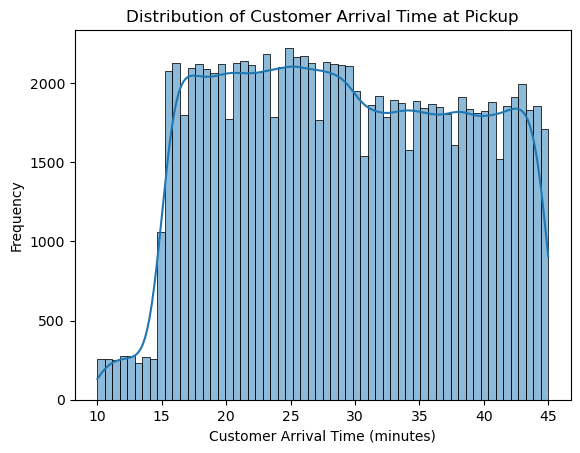

In [18]:
# Customer Arrival Time (Pickup)
sns.histplot(df['Avg_CTAT'], bins=60, kde=True)
plt.title('Distribution of Customer Arrival Time at Pickup')
plt.xlabel('Customer Arrival Time (minutes)')
plt.ylabel('Frequency')
plt.show()

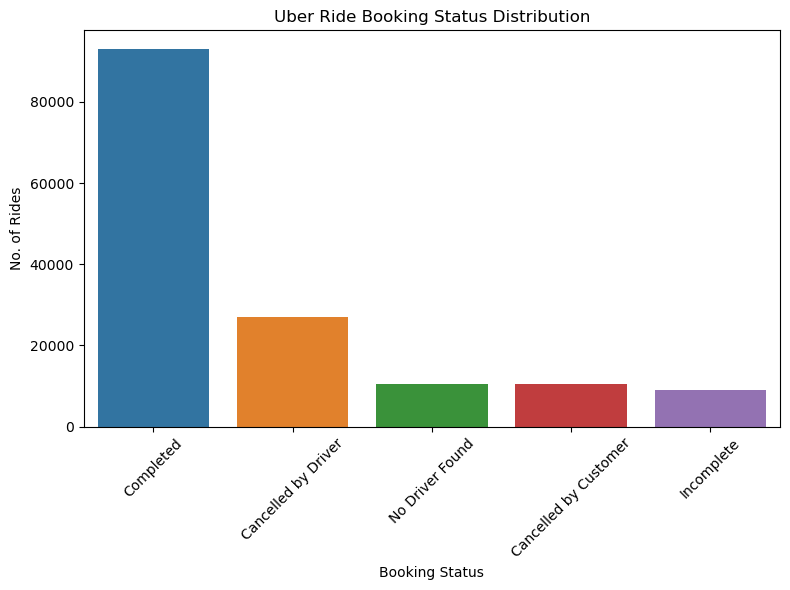

In [19]:
# Uber Rides Status
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Booking_Status', order=df['Booking_Status'].value_counts().index)
plt.title('Uber Ride Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('No. of Rides')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


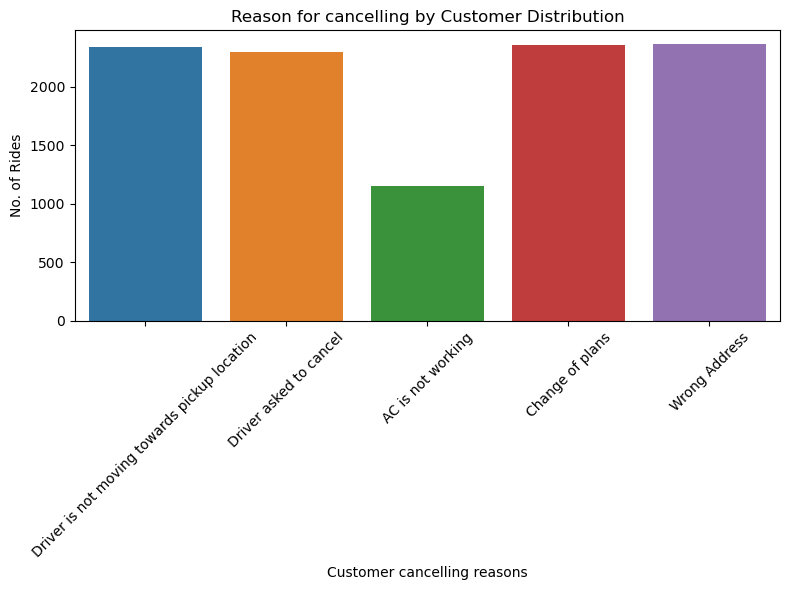

In [20]:
# Reason for cancelling by Customer
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Reason_for_cancelling_by_Customer')
plt.title('Reason for cancelling by Customer Distribution')
plt.xlabel('Customer cancelling reasons')
plt.ylabel('No. of Rides')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


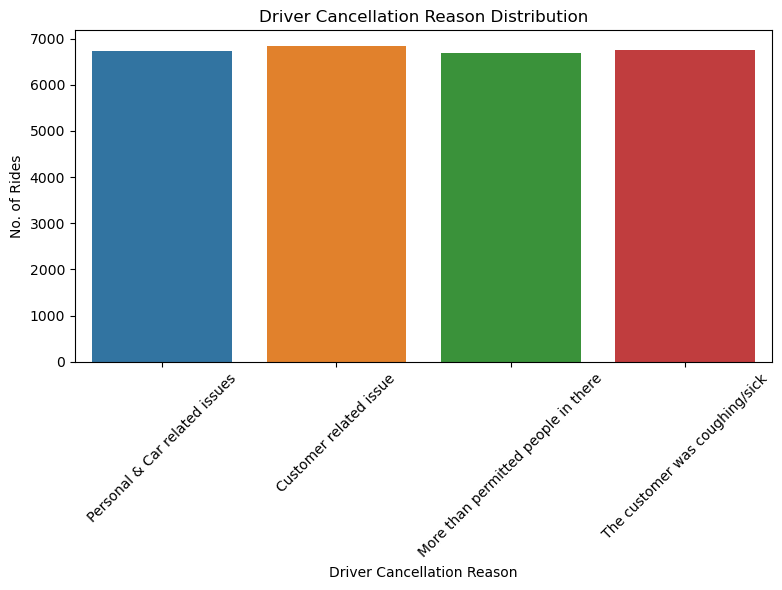

In [21]:
# Reason for cancelling by Driver
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Driver_Cancellation_Reason')
plt.title('Driver Cancellation Reason Distribution')
plt.xlabel('Driver Cancellation Reason')
plt.ylabel('No. of Rides')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

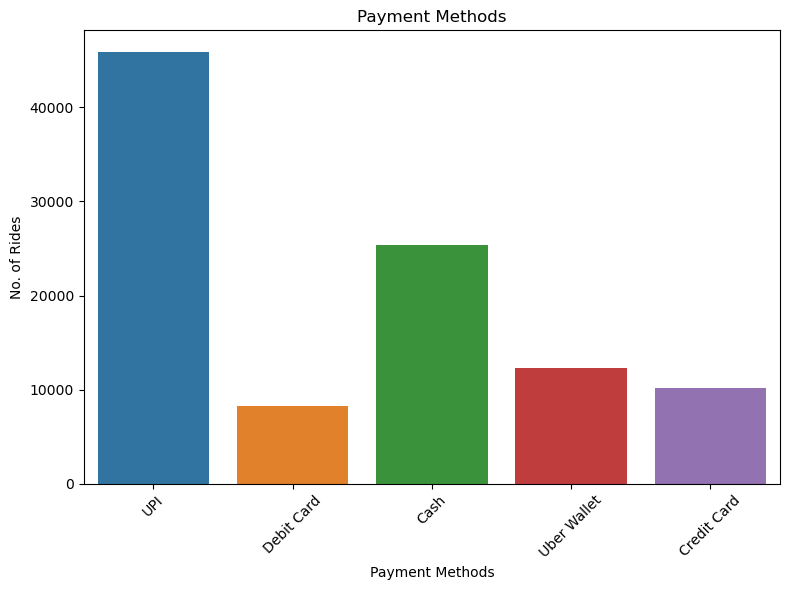

In [22]:
# Payment Method
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Payment_Method')
plt.title('Payment Methods')
plt.xlabel('Payment Methods')
plt.ylabel('No. of Rides')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

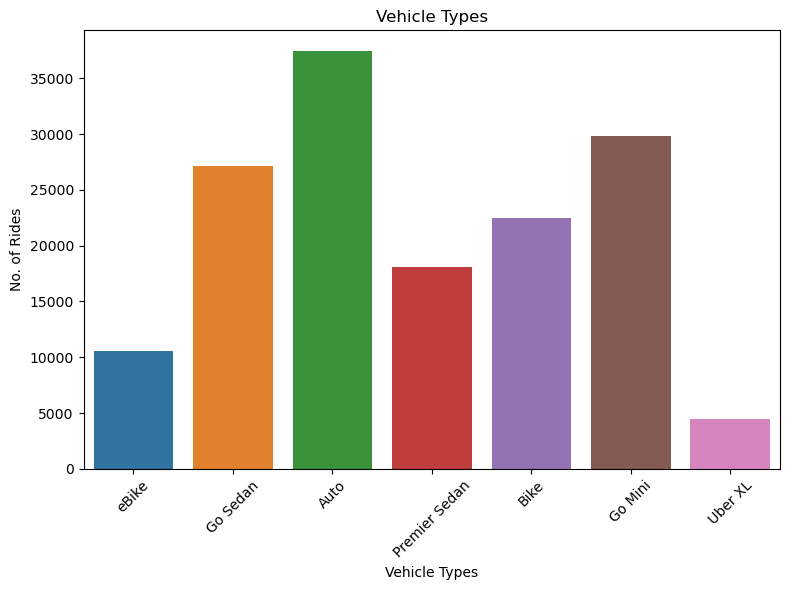

In [23]:
# Vehicle Type
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Vehicle_Type')
plt.title('Vehicle Types')
plt.xlabel('Vehicle Types')
plt.ylabel('No. of Rides')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

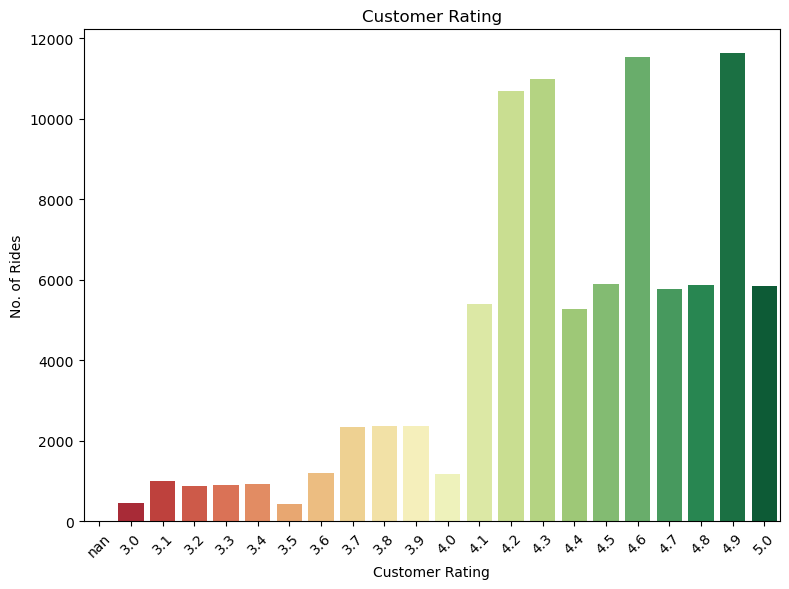

In [24]:
# Customer Rating
categories = sorted(df['Customer_Rating'].unique())
n = len(categories)
colors = plt.cm.RdYlGn(np.linspace(0, 1, n))  # red to green

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='Customer_Rating',
    order=categories,
    palette=colors
)
plt.title('Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('No. of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

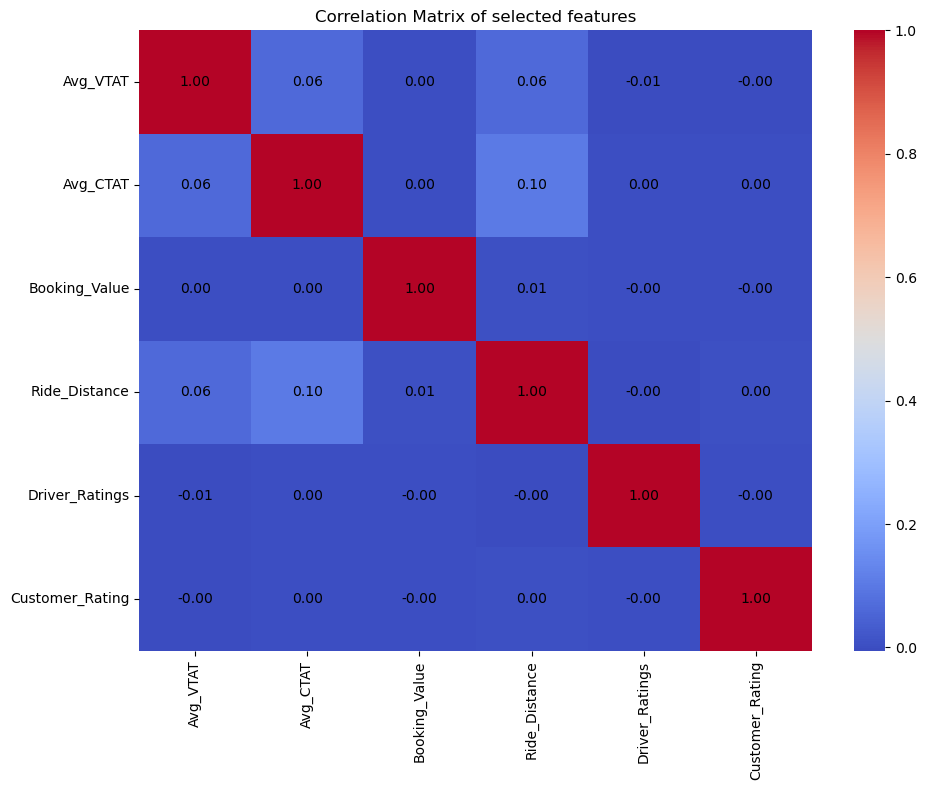

In [25]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[['Avg_VTAT', 'Avg_CTAT', 'Booking_Value', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating']].corr(), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    annot_kws={"color": "black"}
)
plt.title('Correlation Matrix of selected features')
plt.tight_layout()
plt.show()


From above correlation matrix, we could see variables are independent, with no correlation higher than 0.1.

# Machine Learning

In [26]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, f1_score



## Data Preparation


In [27]:
# Target and features
y = df['Booking_Status']
X = df.drop(columns=['Booking_Status', 'Booking_ID', 'Customer_ID',
                      'Reason_for_cancelling_by_Customer', 'Driver_Cancellation_Reason', 'Incomplete_Rides_Reason',
                      'Cancelled_Rides_by_Customer', 'Cancelled_Rides_by_Driver', 'Incomplete_Rides',
                      'Customer_Rating', 'Driver_Ratings'], errors='ignore') # Columns dropped to avoid leakage

X['Hour'] = X['Datetime'].dt.hour
X['DayOfWeek'] = X['Datetime'].dt.dayofweek
X['Month'] = X['Datetime'].dt.month
X['IsWeekend'] = (X['DayOfWeek'] >= 5).astype(int)

# Feature groups
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

X.shape, y.shape


((150000, 13), (150000,))

### Preprocessing Pipeline


In [28]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median'))])
cat_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('Train/Test sizes:', X_train.shape, X_test.shape)


Train/Test sizes: (120000, 13) (30000, 13)


## Original Data

Since we have many rows, with very imbalanced data, we will reduce the amount of hyperparameter tuning and try to use StratifiedKFold so that minority class will remain a certain ratio instead of potentially disappearing.

### Model 1a: Decision Tree Classifier (DTC)


CV Accuracy (mean±std): 0.8885083333333335 ± 0.0014335755609275866
Test Accuracy: 0.8863333333333333
Macro F1: 0.7807862195547598
                       precision    recall  f1-score   support

Cancelled by Customer       0.61      0.63      0.62      2100
  Cancelled by Driver       0.84      0.83      0.84      5400
            Completed       0.95      0.96      0.96     18600
           Incomplete       0.55      0.53      0.54      1800
      No Driver Found       0.96      0.94      0.95      2100

             accuracy                           0.89     30000
            macro avg       0.78      0.78      0.78     30000
         weighted avg       0.89      0.89      0.89     30000



<Figure size 500x400 with 0 Axes>

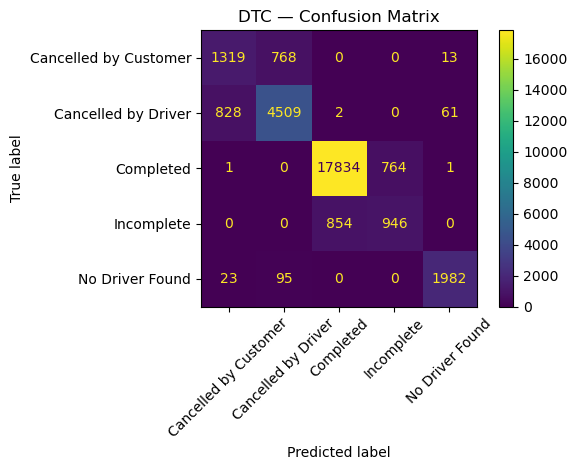

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

model_metrics = {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe_dtc = Pipeline(steps=[('prep', preprocess), ('clf', DecisionTreeClassifier(random_state=42, class_weight='balanced'))])
cv_acc = cross_val_score(pipe_dtc, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print('CV Accuracy (mean±std):', np.mean(cv_acc), '±', np.std(cv_acc))

pipe_dtc.fit(X_train, y_train)
y_pred = pipe_dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print('Test Accuracy:', acc)
print('Macro F1:', f1)
print(classification_report(y_test, y_pred))
model_metrics['Decision Tree'] = {'accuracy': acc, 'f1_macro': f1}

plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title('DTC — Confusion Matrix')
plt.tight_layout()
plt.show()

### Model 2a: Random Forest


CV Accuracy (mean±std): 0.9216166666666668 ± 0.0011412103711021576
Test Accuracy: 0.9218666666666666
Macro F1: 0.8018078337470163
                       precision    recall  f1-score   support

Cancelled by Customer       1.00      0.53      0.70      2100
  Cancelled by Driver       0.85      0.99      0.91      5400
            Completed       0.94      1.00      0.97     18600
           Incomplete       0.93      0.30      0.45      1800
      No Driver Found       0.96      1.00      0.98      2100

             accuracy                           0.92     30000
            macro avg       0.94      0.76      0.80     30000
         weighted avg       0.93      0.92      0.91     30000



<Figure size 500x400 with 0 Axes>

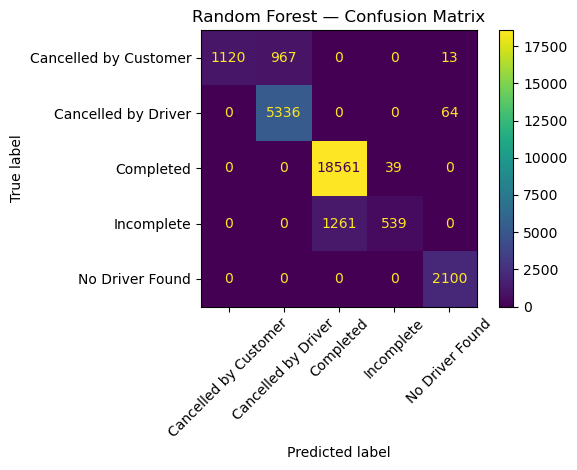

In [30]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline(steps=[('prep', preprocess), ('clf', RandomForestClassifier(random_state=42, n_estimators=400, class_weight='balanced_subsample', n_jobs=-1))])
cv_acc = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print('CV Accuracy (mean±std):', np.mean(cv_acc), '±', np.std(cv_acc))

pipe_rf.fit(X_train, y_train)
y_pred = pipe_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print('Test Accuracy:', acc)
print('Macro F1:', f1)
print(classification_report(y_test, y_pred))
model_metrics['Random Forest'] = {'accuracy': acc, 'f1_macro': f1}

plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title('Random Forest — Confusion Matrix')
plt.tight_layout()
plt.show()

### Model 3a: XGBoost


CV Accuracy (mean±std): 0.9181999999999999 ± 0.0012276897907135297
Test Accuracy: 0.9171666666666667
Macro F1: 0.803952075726659
                       precision    recall  f1-score   support

Cancelled by Customer       0.99      0.53      0.69      2100
  Cancelled by Driver       0.85      0.99      0.91      5400
            Completed       0.94      0.99      0.96     18600
           Incomplete       0.70      0.35      0.47      1800
      No Driver Found       0.96      1.00      0.98      2100

             accuracy                           0.92     30000
            macro avg       0.89      0.77      0.80     30000
         weighted avg       0.91      0.92      0.91     30000



<Figure size 500x400 with 0 Axes>

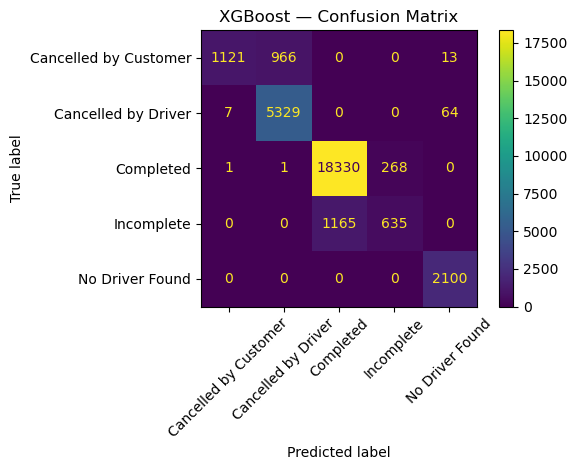

In [31]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode string labels to integers for XGBoost
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

pipe_xgb = Pipeline(steps=[('prep', preprocess), ('clf', XGBClassifier(
    random_state=42,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    objective='multi:softprob',
    tree_method='hist',
    n_jobs=-1,
))])

cv_acc = cross_val_score(pipe_xgb, X_train, y_train_enc, cv=cv, scoring='accuracy', n_jobs=-1)
print('CV Accuracy (mean±std):', np.mean(cv_acc), '±', np.std(cv_acc))

pipe_xgb.fit(X_train, y_train_enc)
y_pred_enc = pipe_xgb.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print('Test Accuracy:', acc)
print('Macro F1:', f1)
print(classification_report(y_test, y_pred))
model_metrics['XGBoost'] = {'accuracy': acc, 'f1_macro': f1}

plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title('XGBoost — Confusion Matrix')
plt.tight_layout()
plt.show()


### Model 4a: Logistic Regression


CV Accuracy (mean±std): 0.561275 ± 0.005193986907954204
Test Accuracy: 0.5635
Macro F1: 0.5215637049386055
                       precision    recall  f1-score   support

Cancelled by Customer       0.25      0.66      0.36      2100
  Cancelled by Driver       0.48      0.55      0.51      5400
            Completed       0.99      0.49      0.65     18600
           Incomplete       0.35      0.90      0.50      1800
      No Driver Found       0.43      0.91      0.58      2100

             accuracy                           0.56     30000
            macro avg       0.50      0.70      0.52     30000
         weighted avg       0.77      0.56      0.59     30000



<Figure size 500x400 with 0 Axes>

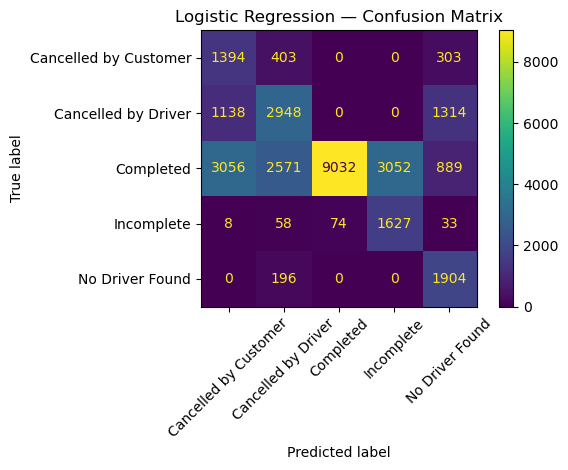

In [32]:
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline(steps=[('prep', preprocess), ('scale', StandardScaler(with_mean=False)), ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='auto', solver='lbfgs'))])
cv_acc = cross_val_score(pipe_lr, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print('CV Accuracy (mean±std):', np.mean(cv_acc), '±', np.std(cv_acc))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print('Test Accuracy:', acc)
print('Macro F1:', f1)
print(classification_report(y_test, y_pred))
model_metrics['Logistic Regression'] = {'accuracy': acc, 'f1_macro': f1}

plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title('Logistic Regression — Confusion Matrix')
plt.tight_layout()
plt.show()


### Model 5a: Stochastic Gradient Descent (SGDClassifier)


SGD loss=log | CV Accuracy (mean±std): 0.5775583333333334 ± 0.04653466151399646
Test Accuracy: 0.5516666666666666
Macro F1: 0.45337921621659644
                       precision    recall  f1-score   support

Cancelled by Customer       0.24      0.70      0.36      2100
  Cancelled by Driver       0.55      0.21      0.31      5400
            Completed       0.85      0.60      0.71     18600
           Incomplete       0.42      0.78      0.54      1800
      No Driver Found       0.25      0.62      0.35      2100

             accuracy                           0.55     30000
            macro avg       0.46      0.58      0.45     30000
         weighted avg       0.69      0.55      0.58     30000



<Figure size 500x400 with 0 Axes>

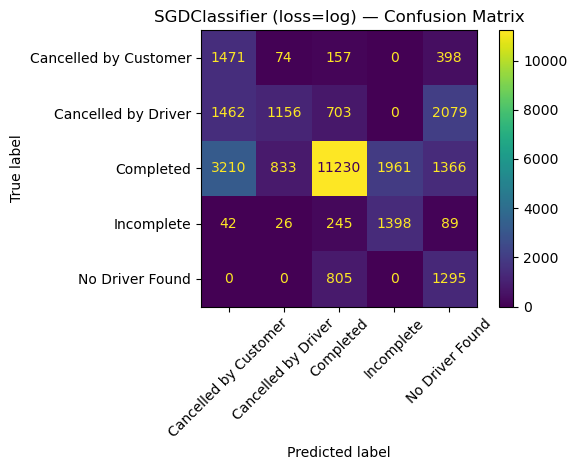

In [33]:
from sklearn.linear_model import SGDClassifier
import sklearn
from packaging import version

# Build an SGD pipeline with a version-safe loss
loss_candidates = []
if version.parse(sklearn.__version__) >= version.parse('1.2'):
    loss_candidates = ['log_loss', 'modified_huber', 'hinge']
else:
    loss_candidates = ['log', 'modified_huber', 'hinge']

last_err = None
for loss_name in loss_candidates:
    try:
        pipe_sgd = Pipeline(steps=[('prep', preprocess), ('scale', StandardScaler(with_mean=False)), ('clf', SGDClassifier(loss=loss_name, max_iter=3000, class_weight='balanced', random_state=42))])
        cv_acc = cross_val_score(pipe_sgd, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
        print(f'SGD loss={loss_name} | CV Accuracy (mean±std):', np.mean(cv_acc), '±', np.std(cv_acc))
        pipe_sgd.fit(X_train, y_train)
        y_pred = pipe_sgd.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        print('Test Accuracy:', acc)
        print('Macro F1:', f1)
        print(classification_report(y_test, y_pred))
        model_metrics['SGDClassifier'] = {'accuracy': acc, 'f1_macro': f1}
        plt.figure(figsize=(5,4))
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
        plt.title(f'SGDClassifier (loss={loss_name}) — Confusion Matrix')
        plt.tight_layout()
        plt.show()
        break
    except Exception as e:
        last_err = e
        continue
else:
    raise last_err

# ROC not printed for SGD (no calibrated probabilities by default)


### Model 6a: Support Vector Machine (SVM)


/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CV Accuracy (mean±std): 0.5729583333333333 ± 0.003327912258458745
Test Accuracy: 0.5698666666666666
Macro F1: 0.40908347474499857
                       precision    recall  f1-score   support

Cancelled by Customer       0.28      0.63      0.39      2100
  Cancelled by Driver       0.47      0.43      0.45      5400
            Completed       0.72      0.65      0.68     18600
           Incomplete       0.39      0.80      0.52      1800
      No Driver Found       0.00      0.00      0.00      2100

             accuracy                           0.57     30000
            macro avg       0.37      0.50      0.41     30000
         weighted avg       0.57      0.57      0.56     30000



<Figure size 500x400 with 0 Axes>

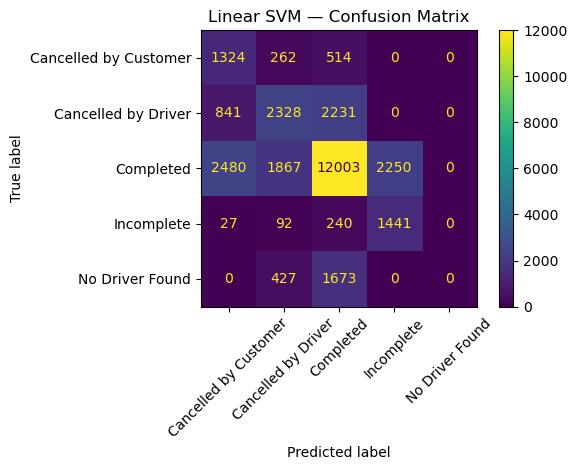

In [34]:
from sklearn.svm import LinearSVC

# Use linear SVM for speed and OvR; scale numeric for margin-based model
pipe_svm = Pipeline(steps=[('prep', preprocess), ('scale', StandardScaler(with_mean=False)), ('clf', LinearSVC(class_weight='balanced', random_state=42, max_iter=5000))])
cv_acc = cross_val_score(pipe_svm, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print('CV Accuracy (mean±std):', np.mean(cv_acc), '±', np.std(cv_acc))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print('Test Accuracy:', acc)
print('Macro F1:', f1)
print(classification_report(y_test, y_pred))
model_metrics['Linear SVM'] = {'accuracy': acc, 'f1_macro': f1}

plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title('Linear SVM — Confusion Matrix')
plt.tight_layout()
plt.show()


### Model Comparison


In [35]:
summary = pd.DataFrame(model_metrics).T.sort_values(by='accuracy', ascending=False)
summary


,accuracy,f1_macro
Random Forest,0.921867,0.801808
XGBoost,0.917167,0.803952
Decision Tree,0.886333,0.780786
Linear SVM,0.569867,0.409083
Logistic Regression,0.563500,0.521564
SGDClassifier,0.551667,0.453379


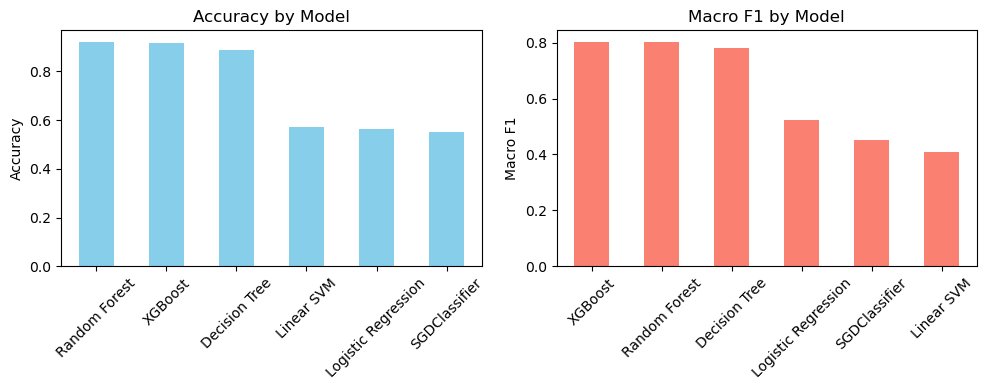

In [36]:
import matplotlib.pyplot as plt

if model_metrics:
    dfm = pd.DataFrame(model_metrics).T
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    dfm['accuracy'].sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title('Accuracy by Model')
    axes[0].set_ylabel('Accuracy')
    axes[0].tick_params(axis='x', rotation=45)

    dfm['f1_macro'].sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='salmon')
    axes[1].set_title('Macro F1 by Model')
    axes[1].set_ylabel('Macro F1')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print('No model metrics collected yet.')


## Undersampling method

In [37]:
y.value_counts(normalize=True)*100


Completed                62.0
Cancelled by Driver      18.0
No Driver Found           7.0
Cancelled by Customer     7.0
Incomplete                6.0
Name: Booking_Status, dtype: float64

Referring to Data Visualisation, "Uber Ride Booking Status Distribution" shows there is a significant class imbalance issue. Hence, in order to resolve potential overfitting issue, we would implement undersampling for the data.

In [38]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold

In [39]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [40]:
y_train_under.value_counts(normalize=True)*100

Cancelled by Customer    20.0
Cancelled by Driver      20.0
Completed                20.0
Incomplete               20.0
No Driver Found          20.0
Name: Booking_Status, dtype: float64

Now we could see classes are balanced. <br> We will use plain kFold since classes are balanced

### Model 1b: Decision Tree Classifier (DTC)

In [41]:
# Set up cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define full pipeline with Decision Tree
pipe_dtc = Pipeline([
    ('prep', preprocess),
    ('clf', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Hyperparameters for grid search
param_grid = {
    'clf__max_depth': [3, 5, 10, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 5],
    'clf__max_features': ['sqrt', 'log2', None]
}

# Perform grid search with cross-validation
grid = GridSearchCV(
    pipe_dtc,
    param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train_under, y_train_under)

# Best model and scores
print('Best hyperparameters:', grid.best_params_)
print('CV Best Accuracy:', grid.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'clf__max_depth': 10, 'clf__max_features': None, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 2}
CV Best Accuracy: 0.8776666666666667


In [42]:
# Evaluate on hold-out test set
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print('Test Accuracy:', acc)
print('Macro F1:', f1)
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8905666666666666
Macro F1: 0.8267329648114223
                       precision    recall  f1-score   support

Cancelled by Customer       0.90      0.55      0.68      2100
  Cancelled by Driver       0.85      0.97      0.90      5400
            Completed       1.00      0.88      0.94     18600
           Incomplete       0.45      1.00      0.62      1800
      No Driver Found       0.97      1.00      0.98      2100

             accuracy                           0.89     30000
            macro avg       0.83      0.88      0.83     30000
         weighted avg       0.93      0.89      0.90     30000



<Figure size 500x400 with 0 Axes>

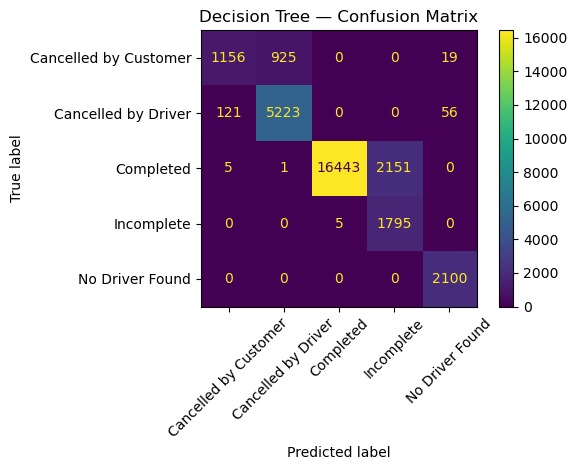

In [43]:
# Confusion matrix plot
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title('Decision Tree — Confusion Matrix')
plt.tight_layout()
plt.show()

In [44]:
# Store metrics
model_metrics_under = {}
model_metrics_under['Decision Tree (Under-sampled)'] = {'accuracy': acc, 'f1_macro': f1}

### Model 2b: Random Forest

In [45]:
# Set up plain KFold cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define full pipeline with Random Forest classifier
pipe_rf = Pipeline([
    ('prep', preprocess),
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced_subsample', n_jobs=-1))
])

# Hyperparameters grid to tune
param_grid_rf = {
    'clf__n_estimators': [100, 200, 400],
    'clf__max_depth': [5, 10, None]
}

# Perform grid search with plain KFold CV
grid_rf = GridSearchCV(
    pipe_rf,
    param_grid_rf,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(X_train, y_train)

# Best model and scores
print('Best hyperparameters (Random Forest):', grid_rf.best_params_)
print('CV Best Accuracy (Random Forest):', grid_rf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters (Random Forest): {'clf__max_depth': None, 'clf__n_estimators': 400}
CV Best Accuracy (Random Forest): 0.9218083333333335


In [46]:
# Evaluate best model on hold-out test set
y_pred = grid_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print('Test Accuracy (Random Forest):', acc)
print('Macro F1 (Random Forest):', f1)
print(classification_report(y_test, y_pred))

Test Accuracy (Random Forest): 0.9218666666666666
Macro F1 (Random Forest): 0.8018078337470163
                       precision    recall  f1-score   support

Cancelled by Customer       1.00      0.53      0.70      2100
  Cancelled by Driver       0.85      0.99      0.91      5400
            Completed       0.94      1.00      0.97     18600
           Incomplete       0.93      0.30      0.45      1800
      No Driver Found       0.96      1.00      0.98      2100

             accuracy                           0.92     30000
            macro avg       0.94      0.76      0.80     30000
         weighted avg       0.93      0.92      0.91     30000



<Figure size 500x400 with 0 Axes>

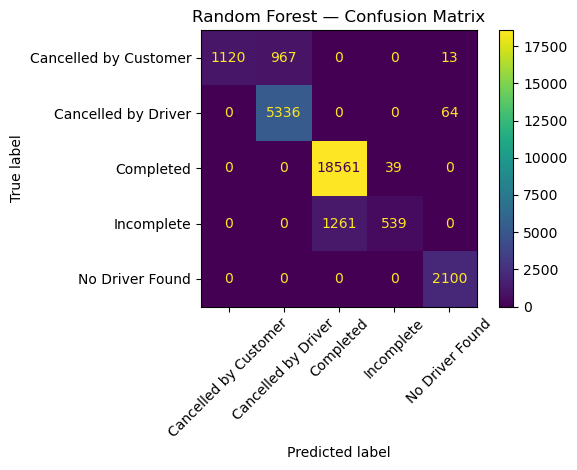

In [47]:
# Confusion matrix plot
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title('Random Forest — Confusion Matrix')
plt.tight_layout()
plt.show()

In [48]:
# Store metrics
model_metrics_under['Random Forest (Under-sampled)'] = {'accuracy': acc, 'f1_macro': f1}
model_metrics_under

{'Decision Tree (Under-sampled)': {'accuracy': 0.8905666666666666,
  'f1_macro': 0.8267329648114223},
 'Random Forest (Under-sampled)': {'accuracy': 0.9218666666666666,
  'f1_macro': 0.8018078337470163}}

### Model 3b: XGBoost

In [49]:
# Set up plain KFold cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define XGBoost pipeline
pipe_xgb = Pipeline([
    ('prep', preprocess),
    ('clf', XGBClassifier(
        random_state=42,
        objective='multi:softprob',
        tree_method='hist',
        n_jobs=-1
    ))
])

# Define hyperparameter grid for XGBoost
param_grid_xgb = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [4, 6],
    'clf__learning_rate': [0.05, 0.1, 0.2],
    'clf__reg_lambda': [0.5, 1.0]
}

# Grid search with KFold cross-validation
grid_xgb = GridSearchCV(
    pipe_xgb,
    param_grid_xgb,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_xgb.fit(X_train, y_train_enc)

# Best hyperparameters and scores
print('Best hyperparameters (XGBoost):', grid_xgb.best_params_)
print('CV Best Accuracy (XGBoost):', grid_xgb.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters (XGBoost): {'clf__learning_rate': 0.05, 'clf__max_depth': 4, 'clf__n_estimators': 100, 'clf__reg_lambda': 0.5}
CV Best Accuracy (XGBoost): 0.9222583333333333


In [50]:
# Evaluate on hold-out test set
y_pred_enc = grid_xgb.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print('Test Accuracy (XGBoost):', acc)
print('Macro F1 (XGBoost):', f1)
print(classification_report(y_test, y_pred))

Test Accuracy (XGBoost): 0.9219666666666667
Macro F1 (XGBoost): 0.7995576641374104
                       precision    recall  f1-score   support

Cancelled by Customer       1.00      0.53      0.69      2100
  Cancelled by Driver       0.85      0.99      0.91      5400
            Completed       0.94      1.00      0.97     18600
           Incomplete       0.99      0.29      0.44      1800
      No Driver Found       0.96      1.00      0.98      2100

             accuracy                           0.92     30000
            macro avg       0.95      0.76      0.80     30000
         weighted avg       0.93      0.92      0.91     30000



<Figure size 500x400 with 0 Axes>

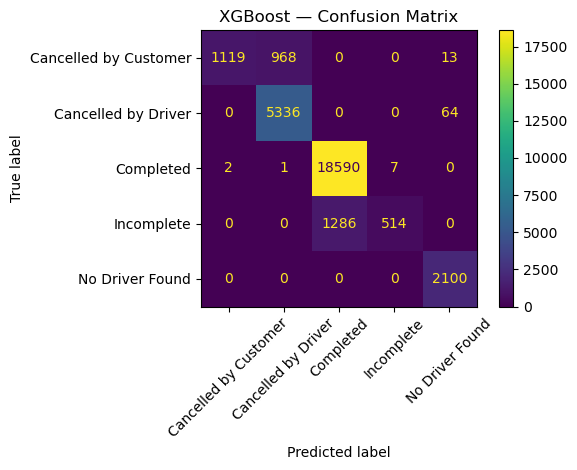

In [51]:
# Confusion matrix plot
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title('XGBoost — Confusion Matrix')
plt.tight_layout()
plt.show()

In [52]:
model_metrics_under['XGBoost (Under-sampled)'] = {'accuracy': acc, 'f1_macro': f1}
model_metrics_under

{'Decision Tree (Under-sampled)': {'accuracy': 0.8905666666666666,
  'f1_macro': 0.8267329648114223},
 'Random Forest (Under-sampled)': {'accuracy': 0.9218666666666666,
  'f1_macro': 0.8018078337470163},
 'XGBoost (Under-sampled)': {'accuracy': 0.9219666666666667,
  'f1_macro': 0.7995576641374104}}

### Model 4b: Logistic Regression

In [53]:
# Cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline with scaling and Logistic Regression
pipe_lr = Pipeline([
    ('prep', preprocess),
    ('scale', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='auto'))
])

# Hyperparameter grid expanded for penalties
param_grid_lr = {
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__solver': ['saga'],
    'clf__C': [0.01, 0.1, 1, 5],
    'clf__l1_ratio': [0.2, 0.5, 0.8]
    }

# Grid search with KFold CV
grid_lr = GridSearchCV(
    pipe_lr,
    param_grid_lr,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_lr.fit(X_train, y_train)

# Best hyperparameters and scores
print('Best hyperparameters (Logistic Regression):', grid_lr.best_params_)
print('CV Best Accuracy (Logistic Regression):', grid_lr.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  

Best hyperparameters (Logistic Regression): {'clf__C': 0.01, 'clf__l1_ratio': 0.8, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
CV Best Accuracy (Logistic Regression): 0.5678916666666667


In [54]:
# Evaluate on hold-out test set
y_pred = grid_lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print('Test Accuracy (Logistic Regression):', acc)
print('Macro F1 (Logistic Regression):', f1)
print(classification_report(y_test, y_pred))

Test Accuracy (Logistic Regression): 0.5683666666666667
Macro F1 (Logistic Regression): 0.5312451070890969
                       precision    recall  f1-score   support

Cancelled by Customer       0.25      0.66      0.36      2100
  Cancelled by Driver       0.49      0.55      0.52      5400
            Completed       0.99      0.48      0.65     18600
           Incomplete       0.35      0.90      0.50      1800
      No Driver Found       0.46      1.00      0.63      2100

             accuracy                           0.57     30000
            macro avg       0.51      0.72      0.53     30000
         weighted avg       0.77      0.57      0.59     30000



<Figure size 500x400 with 0 Axes>

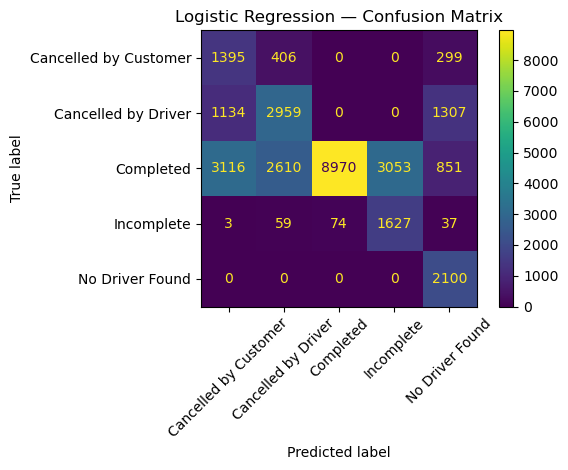

In [55]:
# Confusion matrix plot
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title('Logistic Regression — Confusion Matrix')
plt.tight_layout()
plt.show()

In [56]:
model_metrics_under['Logistic Regression (Under-sampled)'] = {'accuracy': acc, 'f1_macro': f1}
model_metrics_under

{'Decision Tree (Under-sampled)': {'accuracy': 0.8905666666666666,
  'f1_macro': 0.8267329648114223},
 'Random Forest (Under-sampled)': {'accuracy': 0.9218666666666666,
  'f1_macro': 0.8018078337470163},
 'XGBoost (Under-sampled)': {'accuracy': 0.9219666666666667,
  'f1_macro': 0.7995576641374104},
 'Logistic Regression (Under-sampled)': {'accuracy': 0.5683666666666667,
  'f1_macro': 0.5312451070890969}}

### Model 5b: Stochastic Gradient Descent (SGDClassifier)

In [57]:
# KFold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# SGDClassifier pipeline with scaling
pipe_sgd = Pipeline([
    ('prep', preprocess),
    ('scale', StandardScaler(with_mean=False)),
    ('clf', SGDClassifier(
        max_iter=3000,
        class_weight='balanced',
        random_state=42
    ))
])

# Hyperparameter grid for SGDClassifier
param_grid_sgd = {
    'clf__loss': ['log_loss', 'hinge', 'modified_huber'],
    'clf__penalty': ['l1', 'l2'],
    'clf__alpha': [0.0001, 0.001, 0.01]
}

# Grid search with KFold CV
grid_sgd = GridSearchCV(
    pipe_sgd,
    param_grid_sgd,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_sgd.fit(X_train, y_train)

print('Best hyperparameters (SGDClassifier):', grid_sgd.best_params_)
print('CV Best Accuracy (SGDClassifier):', grid_sgd.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters (SGDClassifier): {'clf__alpha': 0.001, 'clf__loss': 'modified_huber', 'clf__penalty': 'l1'}
CV Best Accuracy (SGDClassifier): 0.6082166666666666


In [58]:
# Test set evaluation
y_pred = grid_sgd.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print('Test Accuracy (SGDClassifier):', acc)
print('Macro F1 (SGDClassifier):', f1)
print(classification_report(y_test, y_pred))

Test Accuracy (SGDClassifier): 0.5937333333333333
Macro F1 (SGDClassifier): 0.4374730184052793
                       precision    recall  f1-score   support

Cancelled by Customer       0.26      0.66      0.37      2100
  Cancelled by Driver       0.41      0.79      0.54      5400
            Completed       0.98      0.58      0.73     18600
           Incomplete       0.44      0.74      0.55      1800
      No Driver Found       0.00      0.00      0.00      2100

             accuracy                           0.59     30000
            macro avg       0.42      0.55      0.44     30000
         weighted avg       0.72      0.59      0.61     30000



<Figure size 500x400 with 0 Axes>

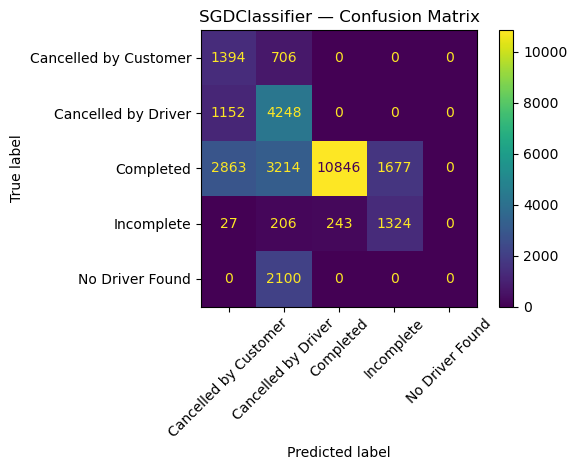

In [59]:
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title('SGDClassifier — Confusion Matrix')
plt.tight_layout()
plt.show()

In [60]:
model_metrics_under['SGDClassifier (Under-sampled)'] = {'accuracy': acc, 'f1_macro': f1}
model_metrics_under

{'Decision Tree (Under-sampled)': {'accuracy': 0.8905666666666666,
  'f1_macro': 0.8267329648114223},
 'Random Forest (Under-sampled)': {'accuracy': 0.9218666666666666,
  'f1_macro': 0.8018078337470163},
 'XGBoost (Under-sampled)': {'accuracy': 0.9219666666666667,
  'f1_macro': 0.7995576641374104},
 'Logistic Regression (Under-sampled)': {'accuracy': 0.5683666666666667,
  'f1_macro': 0.5312451070890969},
 'SGDClassifier (Under-sampled)': {'accuracy': 0.5937333333333333,
  'f1_macro': 0.4374730184052793}}

### Model 6b: Support Vector Machine (SVM)

In [61]:
# KFold cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define full pipeline with LinearSVC and scaling
pipe_svm = Pipeline([
    ('prep', preprocess),
    ('scale', StandardScaler(with_mean=False)),
    ('clf', LinearSVC(
        class_weight='balanced',
        random_state=42,
        max_iter=5000
    ))
])

# Hyperparameter grid for LinearSVC
param_grid_svm = {
    'clf__C': [0.01, 0.1, 1, 5],
    'clf__penalty': ['l2'],
    'clf__loss': ['squared_hinge'],
    'clf__dual': [True, False]
}

# Grid search with KFold CV
grid_svm = GridSearchCV(
    pipe_svm,
    param_grid_svm,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_svm.fit(X_train, y_train)

print('Best hyperparameters (Linear SVM):', grid_svm.best_params_)
print('CV Best Accuracy (Linear SVM):', grid_svm.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Conv

Best hyperparameters (Linear SVM): {'clf__C': 0.1, 'clf__dual': True, 'clf__loss': 'squared_hinge', 'clf__penalty': 'l2'}
CV Best Accuracy (Linear SVM): 0.5727666666666666


In [62]:
# Test set evaluation
y_pred = grid_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print('Test Accuracy (Linear SVM):', acc)
print('Macro F1 (Linear SVM):', f1)
print(classification_report(y_test, y_pred))

Test Accuracy (Linear SVM): 0.5698333333333333
Macro F1 (Linear SVM): 0.4090115369031525
                       precision    recall  f1-score   support

Cancelled by Customer       0.28      0.63      0.39      2100
  Cancelled by Driver       0.47      0.43      0.45      5400
            Completed       0.72      0.65      0.68     18600
           Incomplete       0.39      0.80      0.52      1800
      No Driver Found       0.00      0.00      0.00      2100

             accuracy                           0.57     30000
            macro avg       0.37      0.50      0.41     30000
         weighted avg       0.57      0.57      0.56     30000



<Figure size 500x400 with 0 Axes>

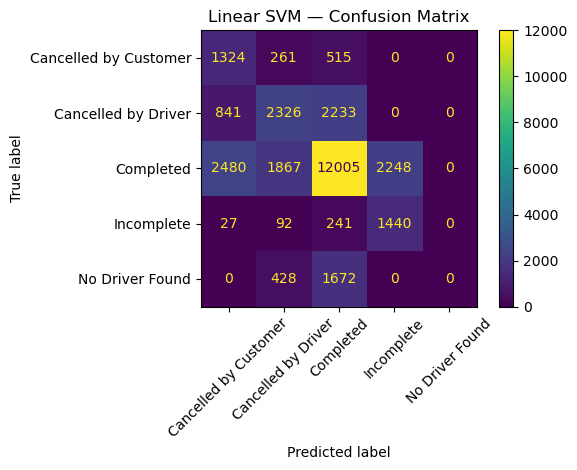

In [63]:
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title('Linear SVM — Confusion Matrix')
plt.tight_layout()
plt.show()

In [64]:
model_metrics_under['Linear SVM (Under-sampled)'] = {'accuracy': acc, 'f1_macro': f1}
model_metrics_under

{'Decision Tree (Under-sampled)': {'accuracy': 0.8905666666666666,
  'f1_macro': 0.8267329648114223},
 'Random Forest (Under-sampled)': {'accuracy': 0.9218666666666666,
  'f1_macro': 0.8018078337470163},
 'XGBoost (Under-sampled)': {'accuracy': 0.9219666666666667,
  'f1_macro': 0.7995576641374104},
 'Logistic Regression (Under-sampled)': {'accuracy': 0.5683666666666667,
  'f1_macro': 0.5312451070890969},
 'SGDClassifier (Under-sampled)': {'accuracy': 0.5937333333333333,
  'f1_macro': 0.4374730184052793},
 'Linear SVM (Under-sampled)': {'accuracy': 0.5698333333333333,
  'f1_macro': 0.4090115369031525}}

### Model Comparison

In [65]:
summary = pd.DataFrame(model_metrics_under).T.sort_values(by='accuracy', ascending=False)
summary

,accuracy,f1_macro
XGBoost (Under-sampled),0.921967,0.799558
Random Forest (Under-sampled),0.921867,0.801808
Decision Tree (Under-sampled),0.890567,0.826733
SGDClassifier (Under-sampled),0.593733,0.437473
Linear SVM (Under-sampled),0.569833,0.409012
Logistic Regression (Under-sampled),0.568367,0.531245


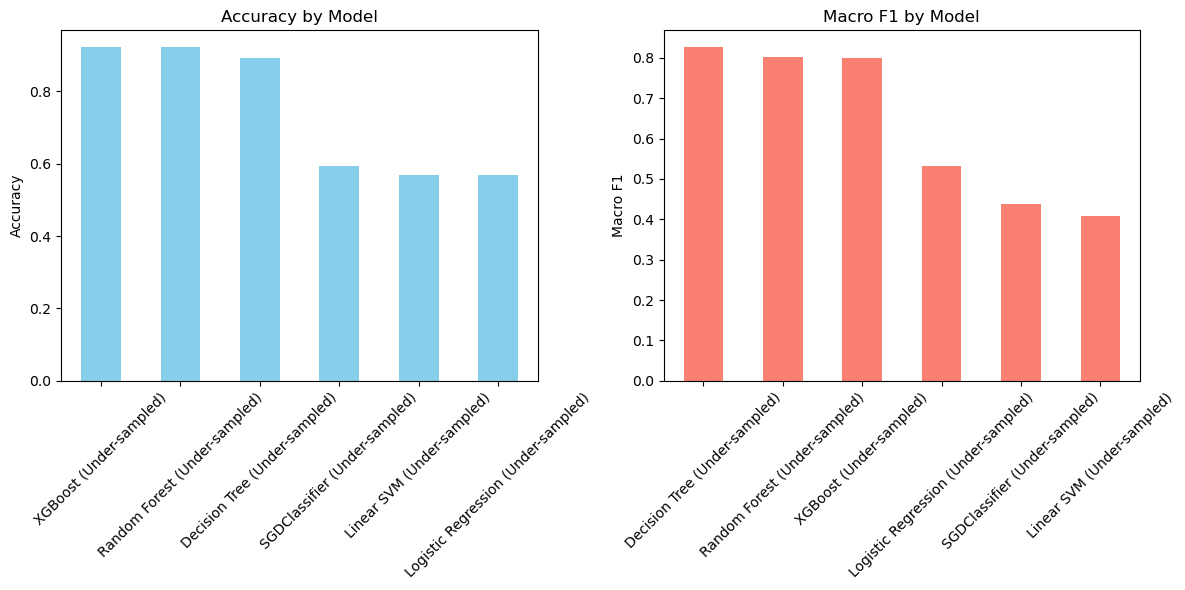

In [69]:
import matplotlib.pyplot as plt

if model_metrics:
    dfm = pd.DataFrame(model_metrics_under).T
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    dfm['accuracy'].sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title('Accuracy by Model')
    axes[0].set_ylabel('Accuracy')
    axes[0].tick_params(axis='x', rotation=45)

    dfm['f1_macro'].sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='salmon')
    axes[1].set_title('Macro F1 by Model')
    axes[1].set_ylabel('Macro F1')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print('No model metrics collected yet.')

## Conclusion

In [71]:
import pandas as pd

# Convert to DataFrame
df_regular = pd.DataFrame(model_metrics).T
df_under = pd.DataFrame(model_metrics_under).T

# Add a column for sampling type
df_regular['sampling'] = 'Regular'
df_under['sampling'] = 'Under-sampled'

# Extract clean model names by removing " (Under-sampled)"
df_regular['model_name'] = df_regular.index.str.replace(r'\s?\(Under-sampled\)', '', regex=True)
df_under['model_name'] = df_under.index.str.replace(r'\s?\(Under-sampled\)', '', regex=True)

# Combine both DataFrames
df_combined = pd.concat([df_regular, df_under])

# Keep only relevant columns
df_combined = df_combined[['model_name', 'sampling', 'accuracy', 'f1_macro']]

# Pivot to show Regular vs Under-sampled side-by-side
summary_df = df_combined.pivot(index='model_name', columns='sampling', values=['accuracy', 'f1_macro'])

# Flatten multi-level columns
summary_df.columns = ['_'.join(col).strip() for col in summary_df.columns.values]

# Optional: sort by Regular accuracy
summary_df = summary_df.sort_values(by='accuracy_Regular', ascending=False).reset_index()
summary_df


,model_name,accuracy_Regular,accuracy_Under-sampled,f1_macro_Regular,f1_macro_Under-sampled
0,Random Forest,0.921867,0.921867,0.801808,0.801808
1,XGBoost,0.917167,0.921967,0.803952,0.799558
2,Decision Tree,0.886333,0.890567,0.780786,0.826733
3,Linear SVM,0.569867,0.569833,0.409083,0.409012
4,Logistic Regression,0.563500,0.568367,0.521564,0.531245
5,SGDClassifier,0.551667,0.593733,0.453379,0.437473
